<a href="https://colab.research.google.com/github/srkumar/Aidetic-Data-Engineer---Assessment-Pyspark-2024/blob/main/Copy_of_Notes_Pandas2_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas-02 Notes

## Content

  - **Concatenation**
    - pd.concat()
      - axis for concat
      - Inner join
      - Outer join
  

- **Merging dataframes**
    - Concat v/s Merge
    - Outer join, Left join, Inner join


- **Intoduction to IMDB dataset**
    - Reading two datasets
  
  
  - **Merging the dataframes**
    - `unique()` and `nunique()`
    - `isin()`
    - Use Left Outer Join and `merge()`
  
  
  - **Feature Exploration**
    - Create new features
  
  
  - **Fetching data using pandas**
    - Quering from dataframe - Masking, Filtering, `&` and `|`
    - String Methods - `contains()`, `startswith()`, `isin()`
    - Grouping
      - Split, Apply, Combine
      - `groupby()`
      - Group based Aggregates
      - `reset_index()`
      - Group based Filtering
      - Group based Transformation
      - `apply()`
  

      

In [ ]:
import pandas as pd
import numpy as np

### Concatenating DataFrames


In [ ]:
a = pd.DataFrame({'A':[10,30], 'B':[20,40]})
b = pd.DataFrame({'A':[10,30], 'C':[20,40]})
a

,A,B
0,10,20
1,30,40


In [ ]:
b

,A,C
0,10,20
1,30,40


#### `pd.concat()`


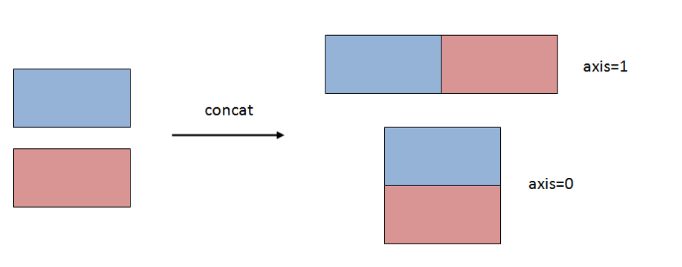

In [ ]:
pd.concat([a, b])

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


#### Takeaways:

- By **default, `axis=0` for concatenation** (row-wise)
  
- Also the indices of the rows are preserved

In [ ]:
pd.concat([a, b]).loc[0]

,A,B,C
0,10,20.0,NaN
0,10,NaN,20.0



#### How can we get unique indices for each row ?
  - By setting `ignore_index = True`

In [ ]:
pd.concat([a, b], ignore_index = True)

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
2,10,NaN,20.0
3,30,NaN,40.0



#### What do we need to change to concatenate them column-wise?

- `axis=1`

In [ ]:
pd.concat([a, b], axis=1)

,A,B,A,C
0,10,20,10,20
1,30,40,30,40


#### Takeaway?
- It gives 2 columns with **different positional index**, but **same label**

#### We can also create a multi-indexed dataframe by mentioning the keys for each dataframe being concatenateed

In [ ]:
pd.concat([a, b], keys=["x", "y"])

A     B     C
x 0  10  20.0   NaN
  1  30  40.0   NaN
y 0  10   NaN  20.0
  1  30   NaN  40.0

#### Which join can we use if we want a union of cols ?
  - Outer join
  - default for pd.concat

In [ ]:
pd.concat([a, b], join="outer")

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


#### And what if we want an intersection of cols ?
  - inner join


In [ ]:
pd.concat([a, b], join="inner")

,A
0,10
1,30
0,10
1,30



#### whats the difference between concat and merge ?

  - `concat`
    - simply stacks multiple DataFrame together along an axis


  - `merge`
    - combines dataframes side-by-side based on values in shared columns


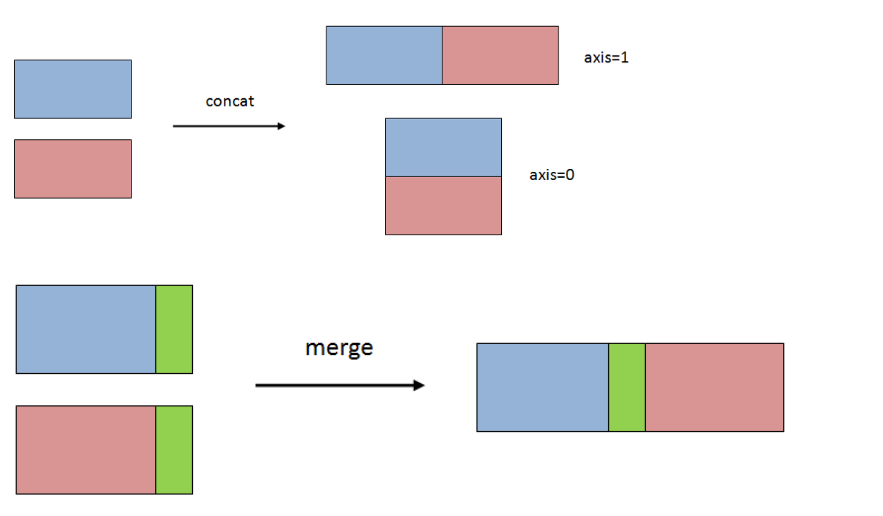



1. `users` --> **Stores the user details** - **IDs** and **Names of users**

In [ ]:
users = pd.DataFrame({'userid':[1, 2, 3], 'name':['A', 'B', 'C']})
users

,userid,name
0,1,A
1,2,B
2,3,C


2. `msgs` --> **Stores the messages** users have sent - **User IDs** and **messages**

In [ ]:
msgs = pd.DataFrame({'userid':[1, 1, 2], 'msg':['hello', 'bye', 'hi']})
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi


#### How can we get names of the person who have sent a message?


####  can we use pd.concat() for this ?
  - pd.concat() does not work according to the values in the columns


#### Using pd.merge:
  - Uses cols with same name as keys
  - We can specify the cols to use as keys
  - This is done through `on` parameter

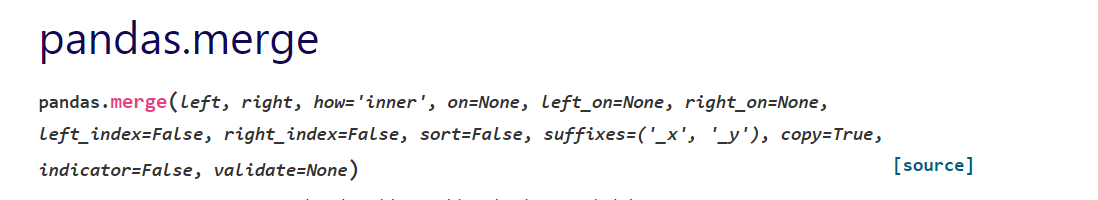

Refer: https://pandas.pydata.org/docs/reference/api/pandas.merge.html

In [ ]:
users.merge(msgs, on="userid")

,userid,name,msg
0,1,A,hello
1,1,A,bye
2,2,B,hi


#### But sometimes the column names might be different even if they contain the same data


#### How can we merge 2 dataframes in this situation ?
  - Using the `left_on` and `right_on` keywords



In [ ]:
users.rename(columns = {"userid": "id"}, inplace = True)
users.merge(msgs, left_on="id", right_on="userid") # this is inner join

# Notice that left_on is column from users
# right_on is column from msgs

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi



### Specifying type of joins to merge the dataframes


#### Lets say we want to find msg text of people only in the `users` table. Which join can we use for that ?
  
  - `Inner join`
  
  - It takes intersection of values in key cols
  
  - Set by default in `pd.merge()`


In [ ]:
users.merge(msgs, how = "inner", left_on = "id", right_on = "userid")

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


#### Now lets say we want a dataframe having all info of all the users.
  
  - Using `outer` join
  
  - It returns a join over the union of the input columns
  
  - Replaces all missing values with `Na`

In [ ]:
users.merge(msgs, how = "outer", left_on = "id", right_on = "userid")

,id,name,userid,msg
0,1,A,1.0,hello
1,1,A,1.0,bye
2,2,B,2.0,hi
3,3,C,NaN,NaN


#### And what if we want vals in key col of left dataframe ?
  - We can use `left` join for that

In [ ]:
users.merge(msgs, how = "left", left_on = "id", right_on = "userid")

,id,name,userid,msg
0,1,A,1.0,hello
1,1,A,1.0,bye
2,2,B,2.0,hi
3,3,C,NaN,NaN


#### Similarly, what if we want vals in key cols of only right dataframe ?

  - Returns join over cols of right input

In [ ]:
users.merge(msgs, how = "right", left_on = "id", right_on = "userid")

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


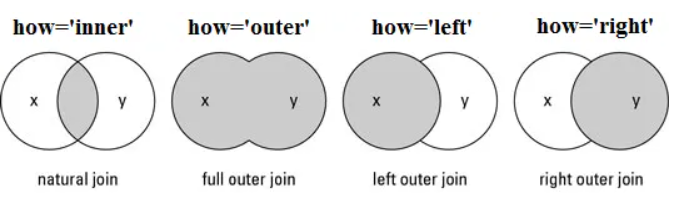

## IMDB Movie Business Use-case


- The database contains info of several years about:
    - Movies
    - Rating
    - Director
    - Popularity
    - Revenue & Budget



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd


Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /Users/anantm/Desktop/dsml-course/07-08-09-Pandas/movies.csv
100%|████████████████████████████████████████| 112k/112k [00:00<00:00, 1.86MB/s]


In [ ]:
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /Users/anantm/Desktop/dsml-course/07-08-09-Pandas/directors.csv
100%|██████████████████████████████████████| 65.4k/65.4k [00:00<00:00, 1.45MB/s]


#### Reading the dataset



In [ ]:
movies = pd.read_csv('movies.csv')
#Top 5 rows
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday



#### what kind of questions can we ask from this dataset?

   - **Top 10 most popular movies**
   - **highest rated movies**
   - **number of movies released per year**
   - **find highest budget movies in a year**

#### Can we ask more interesting/deeper questions?
   - Find the most productive director?
   - Which director produces high budget films?
   - Highest and lowest rated movies for every month in a particular year.



Notice, that we also get a column **Unnamed: 0** which represents nothing but the index of a row.

We can simply add one more argument `index_col=0`(treat first column as index) to get rid of this

The default value is `index_col=None`.



In [ ]:
movies = pd.read_csv('movies.csv', index_col=0)
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
#Lets check the shape of dataset:
movies.shape

(1465, 11)

In [ ]:
directors = pd.read_csv('directors.csv',index_col=0)
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [ ]:
directors.shape

(2349, 3)

### Merging of both Dataframe:

#### So we want to include directors df info into movies df. How can we do this ?

  - `merge()`


But, before merging, check if for all the movies in `movies` df, have their corresponding director details present in the `directors` df or not.





#### How do we get the number of unique directors in `movies`?

We can do it using `nunique()`

- **`unique()`** gives **unique values** in a column

- **`nunique()`** gives **number of unique values** in a column



In [ ]:
movies['director_id'].nunique()

199

In [ ]:
directors['id'].nunique()

2349

- Movies Dataset: 1465 rows, but only 199 unique directors
- Directors Dataset: 2349 unique directors (= no of rows)


#### Inference?

- directors in `movies` is a subset of directors in `directors`
- need to check if we have details for 199 directors present in `directors` df also

#### How to check whether all the values in director_id column of movies is present in id column of director ?

- `isin()` method

#### Cant we do this using Python `in`?

- We can, but this will work for one element at a time.
- We need to do this for all the values in the column
- The `isin()` method checks if the Dataframe column contains the specified value(s).



  

In [ ]:
movies['director_id'].isin(directors['id'])

0       True
1       True
2       True
3       True
5       True
        ... 
4736    True
4743    True
4748    True
4749    True
4768    True
Name: director_id, Length: 1465, dtype: bool

In [ ]:
np.all(movies['director_id'].isin(directors['id']))

True

We can use  `LEFT OUTER JOIN` to merge

#### Recall what will Left Outer Join do?
Left outer join will include all the rows of df `movies` and only those from `directors` that match with values of `movies`['director_id']

<img src="https://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png?ezimgfmt=ng:webp/ngcb1" />





In [ ]:
# if column name is not same
# `left_on`: Specifies the key of the 1st dataframe
# `right_on`: Specifies the key of the 2nd dataframe
data = movies.merge(directors, how='left', left_on='director_id',right_on='id')
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male


Since the columns with name `id`is present in both the df.

After merging:

- id_x : represents id values from movie df
- id_y: represents id values from directors df



### Dropping redundant columns

In [ ]:
data.drop(['director_id','id_y'],axis=1,inplace=True)
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


## Feature Exploration





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 148.8+ KB


In [ ]:
data.describe()

,id_x,budget,popularity,revenue,vote_average,vote_count,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,2016.000000


In [ ]:
data.describe(include=object)

,title,month,day,director_name,gender
count,1465,1465,1465,1465,1341
unique,1465,12,7,199,2
top,Zathura: A Space Adventure,Dec,Friday,Steven Spielberg,Male
freq,1,193,654,26,1309


- the range of values in the `revenue` and `budget` seem to be very high. So, it will be better to change the values into `million dollars USD`

#### How will you change the values of `revenue` and `budget` into `million dollars USD?


In [ ]:
data['revenue'] = (data['revenue']/1000000).round(2)
data


,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,0.32,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male
1461,48370,27000,19,3.15,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male
1462,48375,0,7,0.00,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0,3,0.00,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male


In [ ]:
data['budget']=(data['budget']/1000000).round(2)
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male



## Fetching queries from dataframe

#### Lets say we are interested in fetching all highly rates movies (ratings > 7)

### Masking

In [ ]:
data['vote_average'] > 7

0        True
1       False
2       False
3        True
4       False
        ...  
1460     True
1461     True
1462    False
1463    False
1464    False
Name: vote_average, Length: 1465, dtype: bool


#### How do we get the row values ?
  - By applying `.loc[]`
  - This is known as **filtering**

In [ ]:
data.loc[data['vote_average'] > 7]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
3,43600,250.00,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
14,43616,250.00,120,956.02,The Hobbit: The Battle of the Five Armies,7.1,4760,2014,Dec,Wednesday,Peter Jackson,Male
16,43619,250.00,94,958.40,The Hobbit: The Desolation of Smaug,7.6,4524,2013,Dec,Wednesday,Peter Jackson,Male
19,43622,200.00,100,1845.03,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,48321,0.01,20,7.00,Eraserhead,7.5,485,1977,Mar,Saturday,David Lynch,Male
1457,48323,0.00,5,0.00,The Mighty,7.1,51,1998,Oct,Friday,Peter Chelsom,Male
1458,48335,0.06,27,3.22,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male
1460,48363,0.00,3,0.32,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male


- it always a safe option to create a copy of your dataframe using **copy()** and perform any analysis using the copy

In [ ]:
df = data.copy(deep=True)


#### You can also perform the filtering without even using `loc`




In [ ]:
df[df['vote_average'] > 7]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
3,43600,250.00,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
14,43616,250.00,120,956.02,The Hobbit: The Battle of the Five Armies,7.1,4760,2014,Dec,Wednesday,Peter Jackson,Male
16,43619,250.00,94,958.40,The Hobbit: The Desolation of Smaug,7.6,4524,2013,Dec,Wednesday,Peter Jackson,Male
19,43622,200.00,100,1845.03,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,48321,0.01,20,7.00,Eraserhead,7.5,485,1977,Mar,Saturday,David Lynch,Male
1457,48323,0.00,5,0.00,The Mighty,7.1,51,1998,Oct,Friday,Peter Chelsom,Male
1458,48335,0.06,27,3.22,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male
1460,48363,0.00,3,0.32,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male


#### But this is not recommended. Why ?
  - It can create a confusion between implicit/explicit indexing used as discussed before
  - `loc` is also much faster


#### We can also return only the subsets of columns



In [ ]:
df.loc[df['vote_average'] > 7, ['title','vote_average']]
# These will be the only 2 columns printed out

,title,vote_average
0,Avatar,7.2
3,The Dark Knight Rises,7.6
14,The Hobbit: The Battle of the Five Armies,7.1
16,The Hobbit: The Desolation of Smaug,7.6
19,Titanic,7.5
...,...,...
1456,Eraserhead,7.5
1457,The Mighty,7.1
1458,Pi,7.1
1460,The Last Waltz,7.9


#### Multiple conditions to filter rows

#### What if we want to fetch recently released (after 2014) highly rated latest movies?



#### Notes for applying mutliple conditions:

- Use elementwise operator `&` or `|`
- **we cannot use `and` or `or` with dataframe as a  dataframe has multiple values**
- **for multiple conditions, we need to put each separate condition within parenthesis `()`**

In [ ]:
df.loc[(df['vote_average'] > 7) & (df['year'] >= 2015)].head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
30,43641,190.0,102,1506.25,Furious 7,7.3,4176,2015,Apr,Wednesday,James Wan,Male
78,43724,150.0,434,378.86,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male
106,43773,135.0,100,532.95,The Revenant,7.3,6396,2015,Dec,Friday,Alejandro González Iñárritu,Male
162,43867,108.0,167,630.16,The Martian,7.6,7268,2015,Sep,Wednesday,Ridley Scott,Male
312,44128,75.0,48,108.15,The Man from U.N.C.L.E.,7.1,2265,2015,Aug,Thursday,Guy Ritchie,Male


#### Get all the movies which are alphabetically before movie title 'Avengers'

In [ ]:
df.loc[df['title'] < 'Avengers']
# String comparisons like this (>, <, ==) are also possible

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
23,43629,200.0,78,1025.49,Alice in Wonderland,6.4,4645,2010,Mar,Wednesday,Tim Burton,Male
40,43656,200.0,45,769.65,2012,5.6,4903,2009,Oct,Saturday,Roland Emmerich,Male
41,43657,200.0,39,325.23,A Christmas Carol,6.6,1095,2009,Nov,Wednesday,Robert Zemeckis,Male
69,43709,155.0,39,167.30,Alexander,5.6,927,2004,Nov,Sunday,Oliver Stone,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1390,47491,3.0,7,20.97,A Room with a View,6.9,156,1985,Dec,Friday,James Ivory,Male
1395,47575,3.0,3,0.00,Amnesiac,4.1,52,2015,Aug,Friday,Michael Polish,Male
1405,47686,2.0,23,20.91,Amores perros,7.6,521,2000,Jun,Friday,Alejandro González Iñárritu,Male
1432,47970,0.0,3,0.00,All the Real Girls,5.9,30,2003,Aug,Friday,David Gordon Green,Male


### String methods in pandas

#### How you can you filters row which has "The" in their movie titles?

- To apply a string method to a column, we will be using the `str` attribute of the Series object.

    - `Series.str.function()`


- `Series.str` can be used to access the values of the series as strings and apply several methods to it.




- First we would need to access that series (or column), then add `.str`, and finally add the specific method we want to use.



- `str.contains()` function is used to test if pattern is contained within a string of a Series



#### Find movies containing 'The' in their title

In [ ]:
df['title'].str.contains('The')

0       False
1       False
2       False
3        True
4       False
        ...  
1460     True
1461    False
1462    False
1463    False
1464    False
Name: title, Length: 1465, dtype: bool

In [ ]:
 df.loc[df['title'].str.contains('The')]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
3,43600,250.00,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
9,43610,255.00,49,89.29,The Lone Ranger,5.9,2311,2013,Jul,Wednesday,Gore Verbinski,Male
11,43612,225.00,53,419.65,The Chronicles of Narnia: Prince Caspian,6.3,1630,2008,May,Thursday,Andrew Adamson,Male
14,43616,250.00,120,956.02,The Hobbit: The Battle of the Five Armies,7.1,4760,2014,Dec,Wednesday,Peter Jackson,Male
16,43619,250.00,94,958.40,The Hobbit: The Desolation of Smaug,7.6,4524,2013,Dec,Wednesday,Peter Jackson,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,48155,0.00,0,0.00,Alleluia! The Devil's Carnival,6.0,2,2016,Mar,Tuesday,Darren Lynn Bousman,Male
1443,48192,0.35,35,29.40,The Evil Dead,7.3,894,1981,Oct,Thursday,Sam Raimi,Male
1449,48244,0.25,6,0.06,The Canyons,4.1,75,2013,Jul,Monday,Paul Schrader,NaN
1457,48323,0.00,5,0.00,The Mighty,7.1,51,1998,Oct,Friday,Peter Chelsom,Male


#### If you want to search for movies that starts with "Batman"
- `.str.startswith()`

In [ ]:
df.loc[df['title'].str.startswith('Batman')]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
5,43606,250.0,155,873.26,Batman v Superman: Dawn of Justice,5.7,7004,2016,Mar,Wednesday,Zack Snyder,Male
74,43716,150.0,115,374.22,Batman Begins,7.5,7359,2005,Jun,Friday,Christopher Nolan,Male
128,43807,125.0,50,238.21,Batman & Robin,4.2,1418,1997,Jun,Friday,Joel Schumacher,Male
184,43896,100.0,48,336.53,Batman Forever,5.2,1498,1995,May,Wednesday,Joel Schumacher,Male
257,44025,80.0,59,280.00,Batman Returns,6.6,1673,1992,Jun,Friday,Tim Burton,Male
704,44956,35.0,44,411.35,Batman,7.0,2096,1989,Jun,Friday,Tim Burton,Male



### Find Top 5 most popular movies?



In [ ]:
df.sort_values(['popularity'],ascending=False).head(5)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
58,43692,165.0,724,675.12,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
78,43724,150.0,434,378.86,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male
119,43796,140.0,271,655.01,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,2003,Jul,Wednesday,Gore Verbinski,Male
120,43797,125.0,206,752.10,The Hunger Games: Mockingjay - Part 1,6.6,5584,2014,Nov,Tuesday,Francis Lawrence,Male
45,43662,185.0,187,1004.56,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male


#### Get the list of movies directed by 'Christopher Nolan'

In [ ]:
df.loc[df['director_name'] == 'Christopher Nolan',['title']]

,title
3,The Dark Knight Rises
45,The Dark Knight
58,Interstellar
59,Inception
74,Batman Begins
565,Insomnia
641,The Prestige
1341,Memento


- The string indicating "Christopher Nolan" could have contain trailing and leading spaces.  
- The better way is to use string method - `contains`

## Grouping

#### we want to know the number of movies released by a particular director

In [ ]:
df.loc[df['director_name'] == 'Christopher Nolan',['title']].count()

title    8
dtype: int64

#### What if we have to do this all possible directors?
- `.value_counts()`

In [ ]:
df["director_name"].value_counts()

Steven Spielberg    26
Martin Scorsese     19
Clint Eastwood      19
Woody Allen         18
Robert Rodriguez    16
                    ..
Andrew Adamson       5
Mira Nair            5
Miguel Arteta        5
Sidney Lumet         5
Les Mayfield         5
Name: director_name, Length: 199, dtype: int64


#### Lets say, now you are interested in finding the highest budget movie of every director?
- Grouping

### What is Grouping ?

- In simpler terms it could be understood through the terms - Split, apply, combine



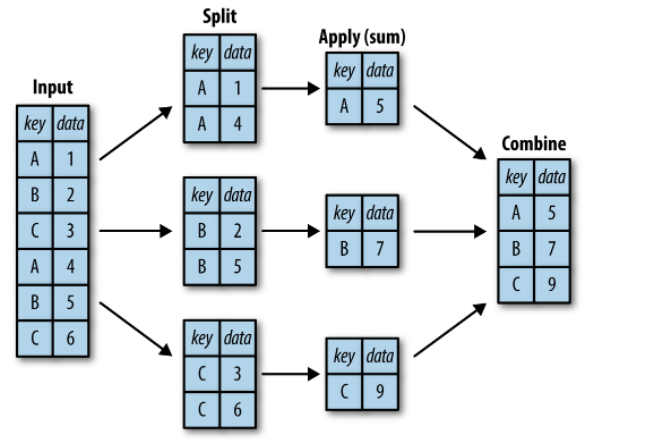

- **Split**: Involves breaking up and grouping a DataFrame depending on the value of the specified key.

- **Apply**: Involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.

- **Combine**: Merges the results of these operations into an output array.

Note: All these steps are to understand the topic, not for real

### Group based Aggregates

#### Now we want to know the count of movies for each director name

In [ ]:
df.groupby('director_name')

- it's a **DataFrameGroupBy type object**, **NOT a DataFrame** type object

#### What is `groupby('director_name')` doing?

- It is **grouping all rows in which director_name value is same**

- All the **rows having same director_name will be grouped together**


Now we want only 1 column (`budget`) of movies from the result of grouping and take it's `max`

In [ ]:
df.groupby('director_name')['budget'].max()

director_name
Adam McKay                     100.0
Adam Shankman                   80.0
Alejandro González Iñárritu    135.0
Alex Proyas                    140.0
Alexander Payne                 30.0
                               ...  
Wes Craven                      40.0
Wolfgang Petersen              175.0
Woody Allen                     30.0
Zack Snyder                    250.0
Zhang Yimou                     94.0
Name: budget, Length: 199, dtype: float64

Similarly, if `value_counts()` wasn't available, same thing can be done by groupby also

In [ ]:
df.groupby('director_name')['title'].count()

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64


#### Question: who is the **most productive director**?

Lets keep it simple for now, lets calculate who has directed maximum number of movies

In [ ]:
df.groupby(['director_name'])['title'].count().sort_values(ascending=False)

director_name
Steven Spielberg    26
Clint Eastwood      19
Martin Scorsese     19
Woody Allen         18
Robert Rodriguez    16
                    ..
Paul Weitz           5
John Madden          5
Paul Verhoeven       5
John Whitesell       5
Kevin Reynolds       5
Name: title, Length: 199, dtype: int64

Looks like `Steven Spielberg` has directed maximum number of movies

#### But does it make him the most productive director?

Chances are, he might be active for more years than other directors

Lets calculate the number of active years of each director

#### How would you calculate active years for every director?

You would have to calculate both `min` and `max` of `year` and then subtract it.

- using `aggregate()` function

In [ ]:
df_agg = df.groupby(['director_name'])[["title", "year"]].aggregate({"year":['min','max'], "title": "count"})
df_agg

year       title
                              min   max count
director_name                                
Adam McKay                   2004  2015     6
Adam Shankman                2001  2012     8
Alejandro González Iñárritu  2000  2015     6
Alex Proyas                  1994  2016     5
Alexander Payne              1999  2013     5
...                           ...   ...   ...
Wes Craven                   1984  2011    10
Wolfgang Petersen            1981  2006     7
Woody Allen                  1977  2013    18
Zack Snyder                  2004  2016     7
Zhang Yimou                  2002  2014     6

[199 rows x 3 columns]


- `director_name` column has turned into row labels
- We see some multiple levels for the column names
- This is called **Multi-index Dataframe**

#### What is Multi-index Dataframe ?
  - It can have **multiple indexes along a dimension**, no of dimensions remain same though, still 2D
  - Multi-level indexes are possible both for rows and columns



In [ ]:
df_agg.columns

MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

As we can, the level-1 column names are `year` and `title`.

if we print "year" column, it should give us both max and min.

In [ ]:
df_agg["year"]

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


#### How can we convert these back to only one level of columns?

Example: `year_min`, `year_max`, `title_count`



In [ ]:
df_agg.columns = ['_'.join(col) for col in df_agg.columns]
df_agg

,year_min,year_max,title_count
director_name,,,
Adam McKay,2004,2015,6
Adam Shankman,2001,2012,8
Alejandro González Iñárritu,2000,2015,6
Alex Proyas,1994,2016,5
Alexander Payne,1999,2013,5
...,...,...,...
Wes Craven,1984,2011,10
Wolfgang Petersen,1981,2006,7
Woody Allen,1977,2013,18


#### How can we convert row labels into columns?

- `reset_index()`


In [ ]:
df_agg.reset_index()

,director_name,year_min,year_max,title_count
0,Adam McKay,2004,2015,6
1,Adam Shankman,2001,2012,8
2,Alejandro González Iñárritu,2000,2015,6
3,Alex Proyas,1994,2016,5
4,Alexander Payne,1999,2013,5
...,...,...,...,...
194,Wes Craven,1984,2011,10
195,Wolfgang Petersen,1981,2006,7
196,Woody Allen,1977,2013,18
197,Zack Snyder,2004,2016,7



#### finding the most productive director


we can calculate rate of directing movies by `title_count`/`yrs_active`




In [ ]:
df_agg["yrs_active"] = df_agg["year_max"] - df_agg["year_min"]
df_agg

,year_min,year_max,title_count,yrs_active
director_name,,,,
Adam McKay,2004,2015,6,11
Adam Shankman,2001,2012,8,11
Alejandro González Iñárritu,2000,2015,6,15
Alex Proyas,1994,2016,5,22
Alexander Payne,1999,2013,5,14
...,...,...,...,...
Wes Craven,1984,2011,10,27
Wolfgang Petersen,1981,2006,7,25
Woody Allen,1977,2013,18,36


#### Now we can calculate the rate of directing movies and sort the values

In [ ]:
df_agg["movie_per_yr"] = df_agg["title_count"] / df_agg["yrs_active"]
df_agg.sort_values("movie_per_yr", ascending=False)

,year_min,year_max,title_count,yrs_active,movie_per_yr
director_name,,,,,
Tyler Perry,2006,2013,9,7,1.285714
Jason Friedberg,2006,2010,5,4,1.250000
Shawn Levy,2002,2014,11,12,0.916667
Robert Rodriguez,1992,2014,16,22,0.727273
Adam Shankman,2001,2012,8,11,0.727273
...,...,...,...,...,...
Lawrence Kasdan,1985,2012,5,27,0.185185
Luc Besson,1985,2014,5,29,0.172414
Robert Redford,1980,2010,5,30,0.166667



### Group based Filtering

### Question : How we find details of the movies by high budget directors?
Lets assume, any director who has created a >100M movie in past is a high budget director
  
question is **not asking us to give the name of the directors who have directed high budget movies**



In [ ]:
df_dir_budget = df.groupby("director_name")["budget"].max().reset_index()
df_dir_budget.loc[df_dir_budget["budget"] >= 100, "director_name"]

0                       Adam McKay
2      Alejandro González Iñárritu
3                      Alex Proyas
5                   Andrew Adamson
10                         Ang Lee
                  ...             
187                    Tom Shadyac
188                     Tom Tykwer
189                     Tony Scott
195              Wolfgang Petersen
197                    Zack Snyder
Name: director_name, Length: 85, dtype: object


#### We want to filter the rows based on some group property (director's max budget movie)

- The cases when we want to filter rows based on group properties (aggragates) is called  **Group Based |Filtering**
- We can group it by director and then use `groupby().filter` function
- **Rows from groups are filtered if they do not satisfy the boolean criterion** specified by func.



In [ ]:
df.groupby('director_name').filter(lambda x: x["budget"].max() >= 100)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.00,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.00,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.00,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.00,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,48267,0.40,33,100.00,Mad Max,6.6,1213,1979,Apr,Thursday,George Miller,Male
1451,48268,0.20,13,4.51,Swingers,6.8,253,1996,Oct,Friday,Doug Liman,Male
1452,48274,0.00,5,2.61,Three,6.3,31,2010,Dec,Thursday,Tom Tykwer,Male
1458,48335,0.06,27,3.22,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male


- Notice, in the output, we have some low budget movies like MadMax.
- But they were filtered because their directors have directed high budget movies as well in the past

### Group based Transformation

Suppose, for every movie, we want to find out if it was an expensive movie for its director

#### How do we assess the budget of any movie wrt director?

we can subtract the average `budget` of a director from `budget` col, for each director

#### How can we do that ?
  - Group data acc to `director_name`
  - Calc its average `budget`
  - Subtract it from the data of that `director_name`
  - This process of changing data using group property is known as **Group based Transformation**


Just like `groupby().filter()`, we will use `grouby().transform()` function here

In [ ]:
def sub_avg(x):
  x["budget"] -= x["budget"].mean()

df.groupby(['director_name']).transform(sub_avg)

KeyError: 'budget'

There is a keyerror, but `budget` column is present in our data

#### Does transform expect us to provide a column?



In [ ]:
def inspect(x):
  print(x)
  print(type(x))
  raise

df.groupby(['director_name']).transform(inspect)

176    43882
323    44151
366    44236
505    44503
839    45301
916    45443
Name: id_x, dtype: int64
<class 'pandas.core.series.Series'>


RuntimeError: No active exception to reraise

Look at the data type of x: pandas Series

Hence transform() can never work with 2 or more cols

#### What should we do about our problem then?

We can pass a column

In [ ]:
def sub_avg(x):
  x -= x.mean()
  return x

df.groupby(['director_name'])["budget"].transform(sub_avg)

0       130.300000
1       141.857143
2       150.142857
3       124.375000
4       174.004545
           ...    
1460    -47.478947
1461    -11.976667
1462    -21.700000
1463    -10.890909
1464    -31.168750
Name: budget, Length: 1465, dtype: float64



#### We want to filter the movies whose budget was even higher than the average revenue of the director from his/her other movies

we can subtract the average `revenue` of a director from `budget` col, for each director

But we can't use `transform` here as it expects only one column


#### How can we do it ? => `.apply()`
  - We need to group data acc to `director_name`
  - Subtracting mean of `budget` from `revenue`


In [ ]:
def func(x):
  x["risky"] = x["budget"] - x["revenue"].mean() >= 0
  return x
df_risky = df.groupby("director_name").apply(func)
df_risky

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,risky
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,False
1,43598,300.00,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,False
2,43599,245.00,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,False
3,43600,250.00,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,False
4,43602,258.00,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0.00,3,0.32,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male,False
1461,48370,0.03,19,3.15,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male,False
1462,48375,0.00,7,0.00,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male,False
1463,48376,0.00,3,0.00,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male,False


In [ ]:
df_risky.loc[df_risky["risky"]]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,risky
7,43608,200.0,107,586.09,Quantum of Solace,6.1,2965,2008,Oct,Thursday,Marc Forster,Male,True
12,43614,380.0,135,1045.71,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,May,Saturday,Rob Marshall,Male,True
15,43618,200.0,37,310.67,Robin Hood,6.2,1398,2010,May,Wednesday,Ridley Scott,Male,True
20,43624,209.0,64,303.03,Battleship,5.5,2114,2012,Apr,Wednesday,Peter Berg,Male,True
24,43630,210.0,3,459.36,X-Men: The Last Stand,6.3,3525,2006,May,Wednesday,Brett Ratner,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,47224,5.0,7,3.26,The Sweet Hereafter,6.8,103,1997,May,Wednesday,Atom Egoyan,Male,True
1349,47229,5.0,3,4.84,90 Minutes in Heaven,5.4,40,2015,Sep,Friday,Michael Polish,Male,True
1351,47233,5.0,6,0.00,Light Sleeper,5.7,15,1992,Aug,Friday,Paul Schrader,NaN,True
1356,47263,15.0,10,0.00,Dying of the Light,4.5,118,2014,Dec,Thursday,Paul Schrader,NaN,True


Note: `apply()` can be applied on any dataframe along any particular axis

- By default axis = 0


In [ ]:
df[['revenue', 'budget']].apply(np.sum, axis = 0)

revenue    209867.04
budget      70353.62
dtype: float64

In [ ]:
df[['revenue', 'budget']].apply(np.sum, axis = 1)

0       3024.97
1       1261.00
2       1125.67
3       1334.94
4       1148.87
         ...   
1460       0.32
1461       3.18
1462       0.00
1463       0.00
1464       2.26
Length: 1465, dtype: float64